#1. Data Mounting and Preprocessing

##1.1. Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

##1.2. Importing CSV

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = "/content/drive/MyDrive/ColabData/HourlyActivity.csv"
df = pd.read_csv(file_path)

##1.3. Processing Data

In [ ]:
# 시간 변환
df = df.dropna(subset=["Hour"])
df["Hour"] = df["Hour"].astype(str).str.replace(":00", "").astype(int)

# 요일 영어로 맞추기 (필요 시)
df["Day"] = df["Day"].replace({
    "월요일": "Monday", "화요일": "Tuesday", "수요일": "Wednesday",
    "목요일": "Thursday", "금요일": "Friday", "토요일": "Saturday", "일요일": "Sunday"
})

# 전체 요일 순서
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Day"] = pd.Categorical(df["Day"], categories=day_order, ordered=True)



---



#2. Customer Count Heatmap

##2.1. Grocery Customers

<ipython-input-99-800e4cc46e8e>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="Customers", index="Hour", columns="Day", aggfunc="mean")


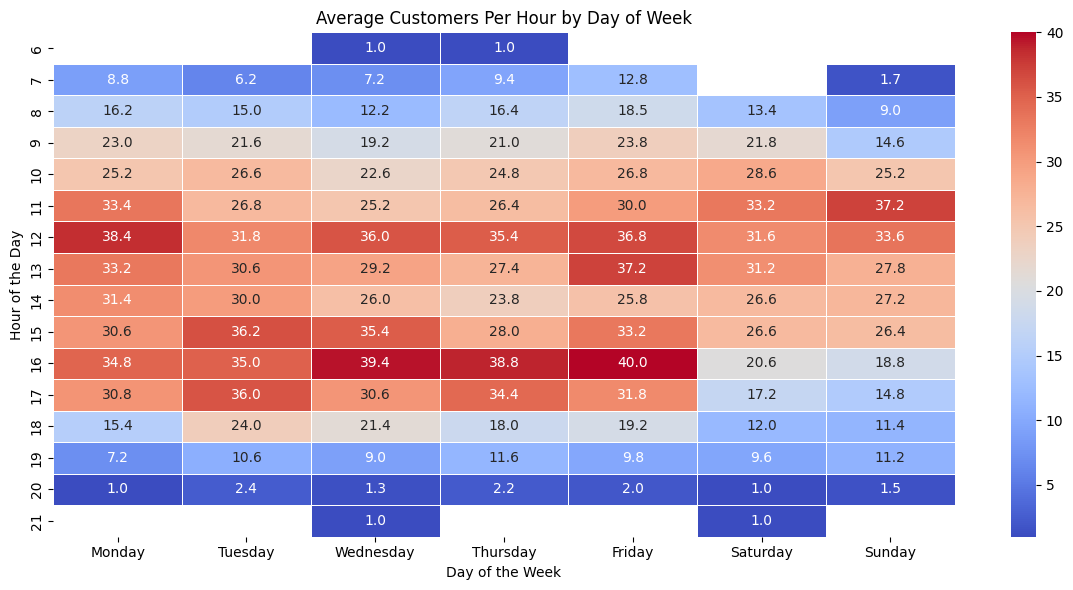

In [ ]:
# Customers 숫자형 변환 및 결측값 처리
df["Customers"] = df["Customers"].astype(float).fillna(0)

# 피벗 테이블 생성 (요일별 평균 방문자 수)
pivot_table = df.pivot_table(values="Customers", index="Hour", columns="Day", aggfunc="mean")
pivot_table = pivot_table.reindex(columns=day_order, fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Average Customers Per Hour by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()

##2.2. Cafe Customers (Order Count)

<ipython-input-100-1d30404f8a11>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="OrderCount", index="Hour", columns="Day", aggfunc="mean")


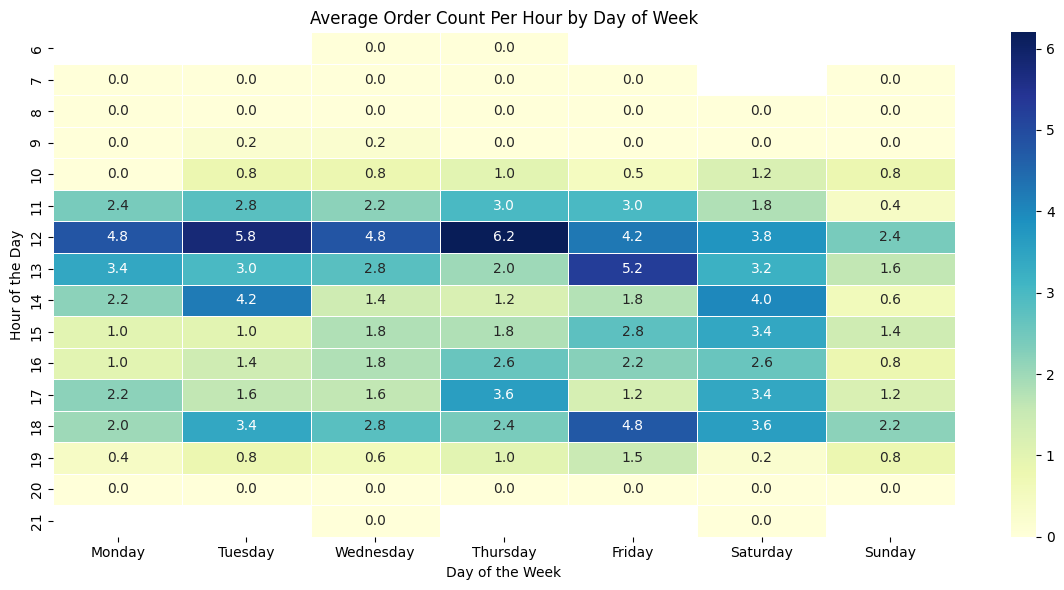

In [ ]:
# Customers 숫자형 변환 및 결측값 처리
df["OrderCount"] = df["OrderCount"].astype(float).fillna(0)

# 피벗 테이블 생성 (요일별 평균 방문자 수)
pivot_table = df.pivot_table(values="OrderCount", index="Hour", columns="Day", aggfunc="mean")
pivot_table = pivot_table.reindex(columns=day_order, fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Average Order Count Per Hour by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()



---



#3. Sales Performance Heatmap

##3.1. Grocery Transaction Value

<ipython-input-101-e3fc440c3af3>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="SalesValue", index="Hour", columns="Day", aggfunc="mean")


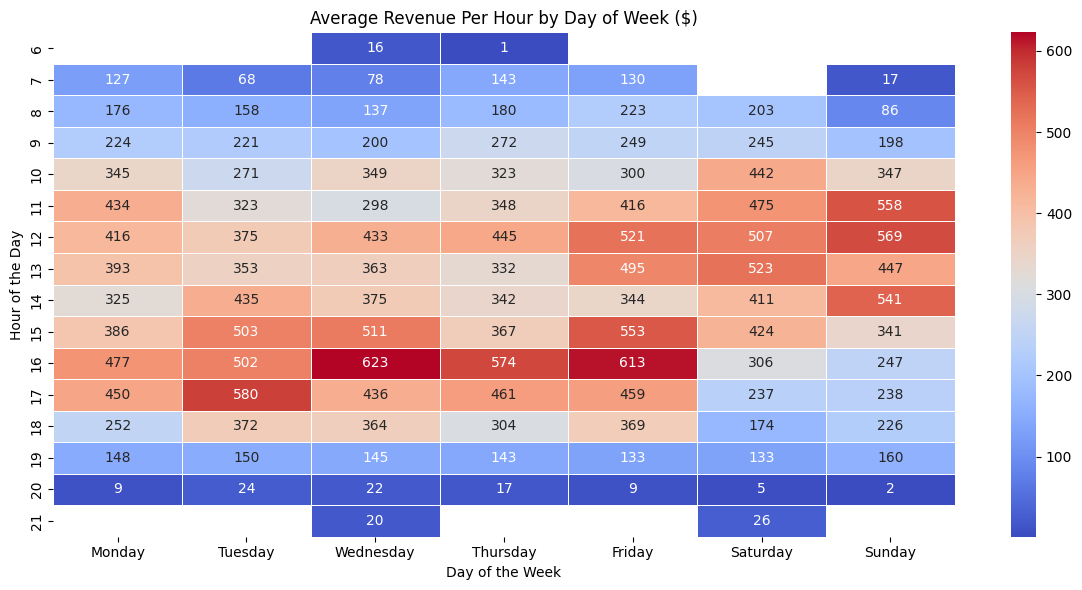

In [ ]:
# Remove non-numeric characters (such as '$' and spaces)
df["SalesValue"] = df["SalesValue"].str.replace(r'[^0-9.]', '', regex=True)
# Convert to float and handle missing values
df["SalesValue"] = df["SalesValue"].astype(float).fillna(0)

# 피벗 테이블 생성 (요일별 평균 매출)
pivot_table = df.pivot_table(values="SalesValue", index="Hour", columns="Day", aggfunc="mean")
pivot_table = pivot_table.reindex(columns=day_order, fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Average Revenue Per Hour by Day of Week ($)")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()

##3.2. Cafe Order Value

<ipython-input-102-8199f22e2dd5>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="OrderValue", index="Hour", columns="Day", aggfunc="mean")


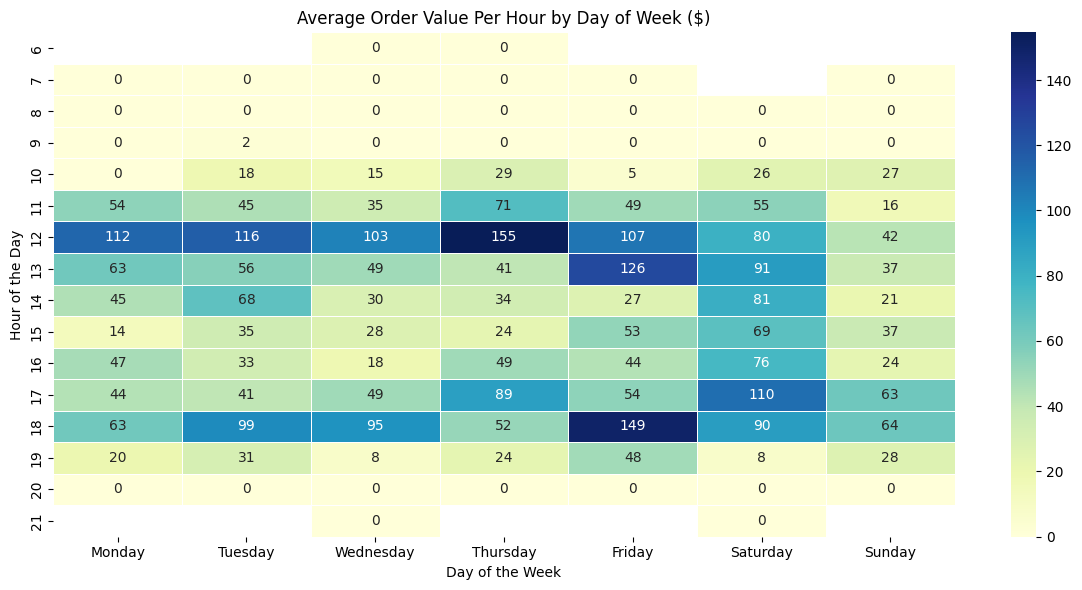

In [ ]:
# Remove non-numeric characters (such as '$' and spaces)
df["OrderValue"] = pd.to_numeric(
    df["OrderValue"].str.replace(r'[^0-9.]', '', regex=True),
    errors='coerce'  # 변환 불가능한 건 NaN으로
).fillna(0)

# 피벗 테이블 생성 (요일별 평균 매출)
pivot_table = df.pivot_table(values="OrderValue", index="Hour", columns="Day", aggfunc="mean")
pivot_table = pivot_table.reindex(columns=day_order, fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Average Order Value Per Hour by Day of Week ($)")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()



---



#4. Average Purchase Level Heatmap

##4.1. Basket Level

<ipython-input-103-16ef417b4cc7>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="Basket Level", index="Hour", columns="Day", aggfunc="mean")


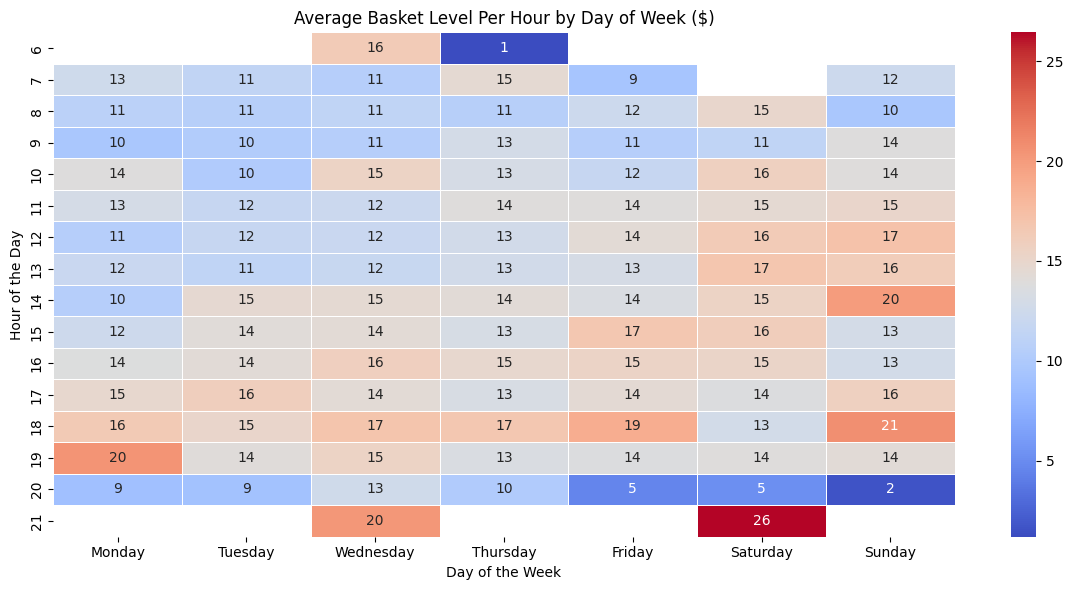

In [ ]:
# 매출 숫자형 변환 및 결측값 처리
df["Basket Level"] = df["Basket Level"].str.replace(r'[^0-9.]', '', regex=True)
# Convert to float and handle missing values
df["Basket Level"] = df["Basket Level"].replace('', pd.NA).astype(float).fillna(0)

# 피벗 테이블 생성 (요일별 평균 매출)
pivot_table = df.pivot_table(values="Basket Level", index="Hour", columns="Day", aggfunc="mean")
pivot_table = pivot_table.reindex(columns=day_order, fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Average Basket Level Per Hour by Day of Week ($)")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()

##4.2. Average Order Level

<ipython-input-104-d073f57c3182>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="OrderLevel", index="Hour", columns="Day", aggfunc="mean")


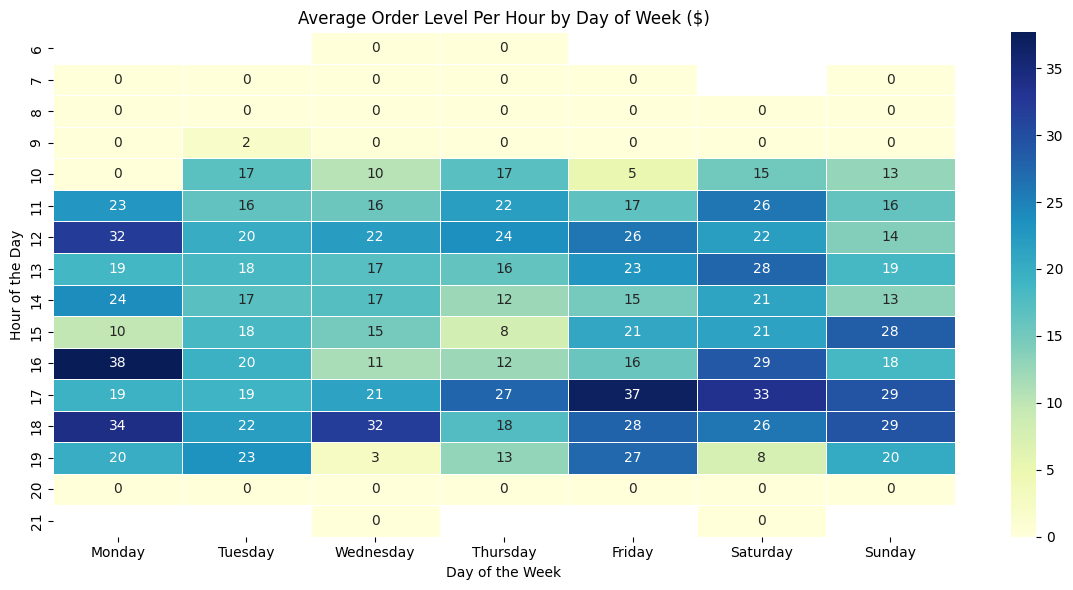

In [ ]:
# 엑셀 에러 문자열 제거 → 숫자만 남기고 → float 변환 → 결측값 0으로
df["OrderLevel"] = pd.to_numeric(
    df["OrderLevel"].astype(str).str.replace(r'[^0-9.]', '', regex=True),
    errors='coerce'  # 변환 불가능한 건 NaN 처리
).fillna(0)  # NaN은 0으로

# 피벗 테이블 생성 (요일별 평균 매출)
pivot_table = df.pivot_table(values="OrderLevel", index="Hour", columns="Day", aggfunc="mean")
pivot_table = pivot_table.reindex(columns=day_order, fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Average Order Level Per Hour by Day of Week ($)")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()

---

#5. Summary

##5.1. Customers (Grocery + Cafe)

<ipython-input-105-30e3d617e49d>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="TotalCustomers", index="Hour", columns="Day", aggfunc="mean")


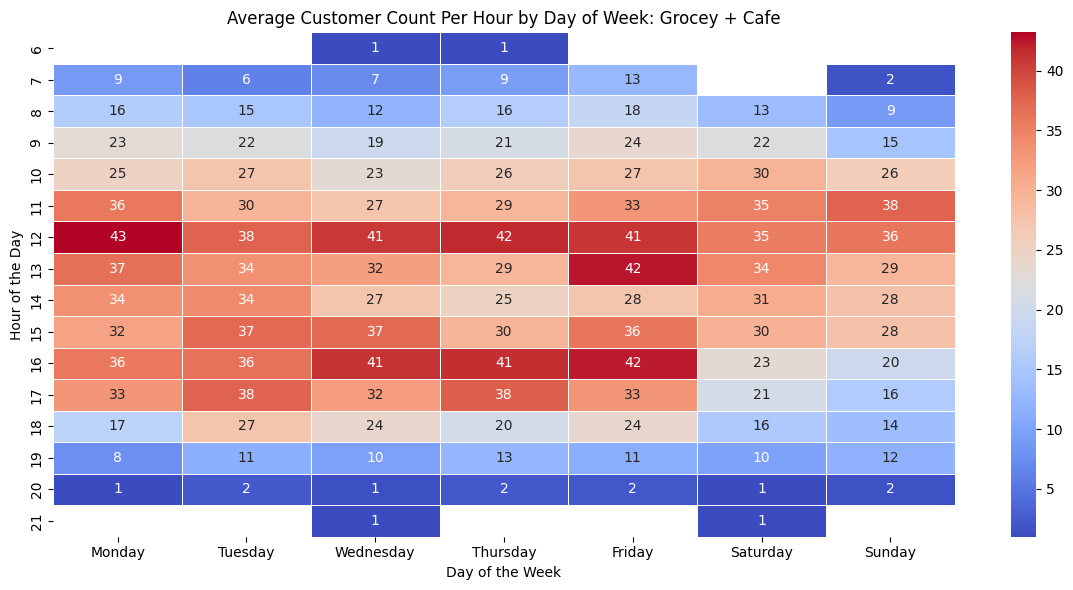

In [ ]:
df["TotalCustomers"] = pd.to_numeric(
    df["TotalCustomers"].astype(str).str.replace(r'[^0-9.]', '', regex=True),
    errors='coerce'  # 변환 불가능한 건 NaN 처리
).fillna(0)  # NaN은 0으로
# 피벗 테이블 생성 (요일별 평균 매출)
pivot_table = df.pivot_table(values="TotalCustomers", index="Hour", columns="Day", aggfunc="mean")
pivot_table = pivot_table.reindex(columns=day_order, fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Average Customer Count Per Hour by Day of Week: Grocey + Cafe")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()

##5.2. Revenue (Grocery + Cafe)

<ipython-input-106-629e796668fc>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="TotalRevenue", index="Hour", columns="Day", aggfunc="mean")


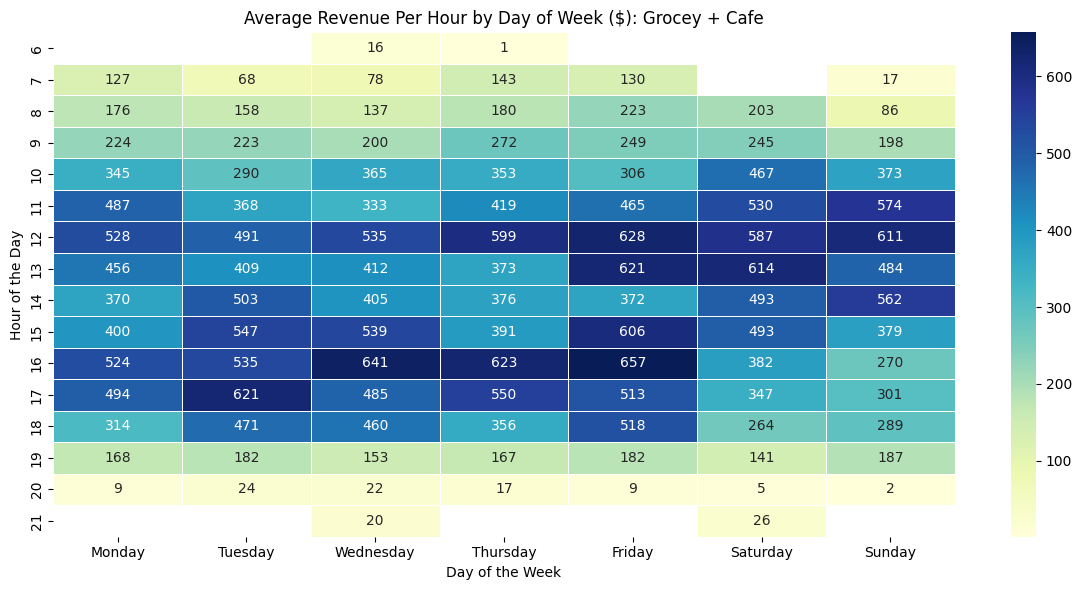

In [ ]:
df["TotalRevenue"] = pd.to_numeric(
    df["TotalRevenue"].astype(str).str.replace(r'[^0-9.]', '', regex=True),
    errors='coerce'  # 변환 불가능한 건 NaN 처리
).fillna(0)  # NaN은 0으로
# 피벗 테이블 생성 (요일별 평균 매출)
pivot_table = df.pivot_table(values="TotalRevenue", index="Hour", columns="Day", aggfunc="mean")
pivot_table = pivot_table.reindex(columns=day_order, fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Average Revenue Per Hour by Day of Week ($): Grocey + Cafe")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()